# Esto es el titulo

In [2]:
import numpy as np
import matplotlib as plt
from pylab import *
import random
from scipy import integrate
import time

In [3]:
def cuadrado(x):
    return x*x

#Hace un for de num_puntos y por cada iteracion crea un punto y comprueba si esta debajo de la integral
#Devuelve el numero de puntos que lo cumplan
def crear_puntos_bucle(a, b, M, num_puntos):
    nDebajo = 0    
    for i in range(num_puntos):
        x = random.uniform(a, b)
        y = random.uniform(0,M)
        if(y <= cuadrado(x)): 
            nDebajo += 1

        #Solo se printean algunos puntos
        if (0 == random.randint(0,10)):
            plt.plot(x,y, marker="x", color="red")
        
    return nDebajo

#Crea dos vectores de tamaño num_puntos de numeros aleatorios en posiciones posibles para las cordenadas x, y
#Devuelve el numero de puntos que cumplan la condicion y > fun(x) (esten debajo de la integral)
def crear_puntos_vectores(a, b, M, num_puntos):
    x = np.random.uniform(a, b, size=num_puntos)
    y = np.random.uniform(0, M, size=num_puntos)
    return np.count_nonzero(y < cuadrado(x))

#Hemos hecho una funcion a parte ya que era mas sencillo calcular los tiempos si quitabamos la grafica
def tiempos(a, b, M, num_puntos):
    t1 = time.process_time()
    nDebajo = 0    
    for i in range(num_puntos):
        x = random.uniform(a, b)
        y = random.uniform(0,M)
        if(y <= cuadrado(x)): 
            nDebajo += 1
    t2 = time.process_time()
    print("El tiempo se tarda con un bucle es: " + str((t2 - t1) *1000))
    t1 = time.process_time()
    x = np.random.uniform(a, b, size=num_puntos)
    y = np.random.uniform(0, M, size=num_puntos)
    np.count_nonzero(y < cuadrado(x))
    t2 = time.process_time()
    print("El tiempo se tarda con vectores es: " + str((t2 - t1) *1000))


In [4]:
def integra_mc(fun, a, b, num_puntos):
    figure(figsize=(15,6))
    
    M = fun(b)
    base = b - a    
    nDebajo = crear_puntos_bucle(a, b, M, num_puntos)
            
    #Parte para graficar
    plt.xlim(0, 6)
    plt.ylim(0, 27)
    x = arange(0, 7, 1)
    plt.plot(x**2)
    plt.legend(["""    La grafica 
    se ha hecho
    con 1 de cada 
    diez puntos 
    creados para que 
    sea visible"""])
    savefig("mc.pdf")
    #Fin de la grafica
    tiempos(a, b, M, num_puntos)
        
    return (nDebajo/num_puntos) * base * M

El tiempo se tarda con un bucle es: 15.625
El tiempo se tarda con vectores es: 0.0
Nuestro resultado: 41.8 y el resultado de sicpy: 41.66666666666666


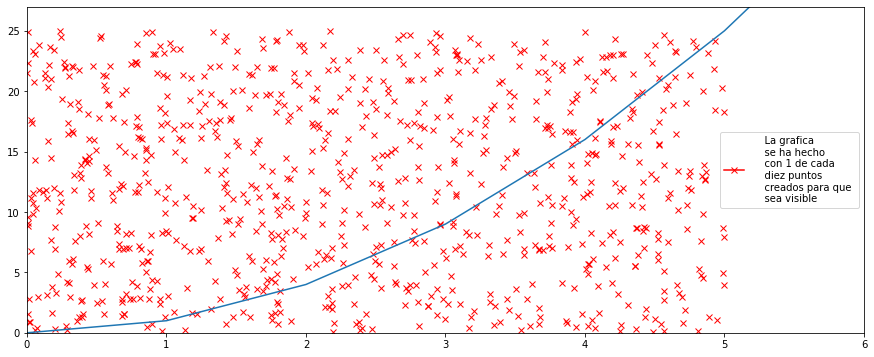

In [5]:
n_puntos = 10000
print("Nuestro resultado: " + str(integra_mc(cuadrado, 0, 5, n_puntos)) + " y el resultado de sicpy: " + str(integrate.quad(cuadrado, 0, 5)[0]))